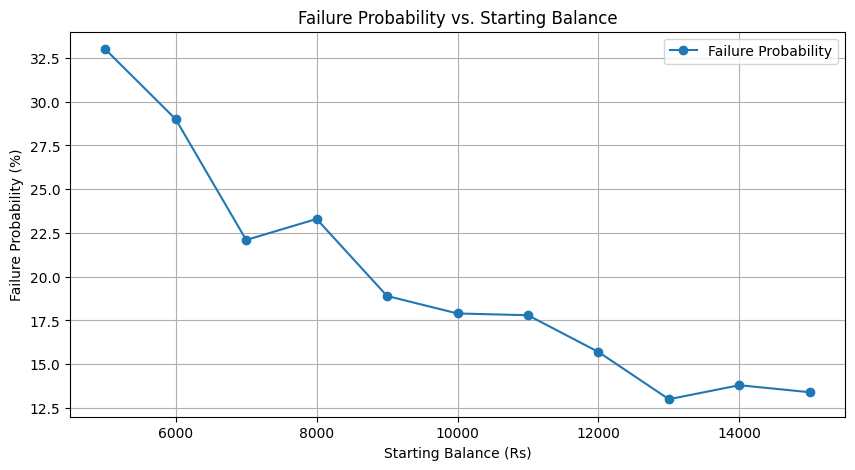

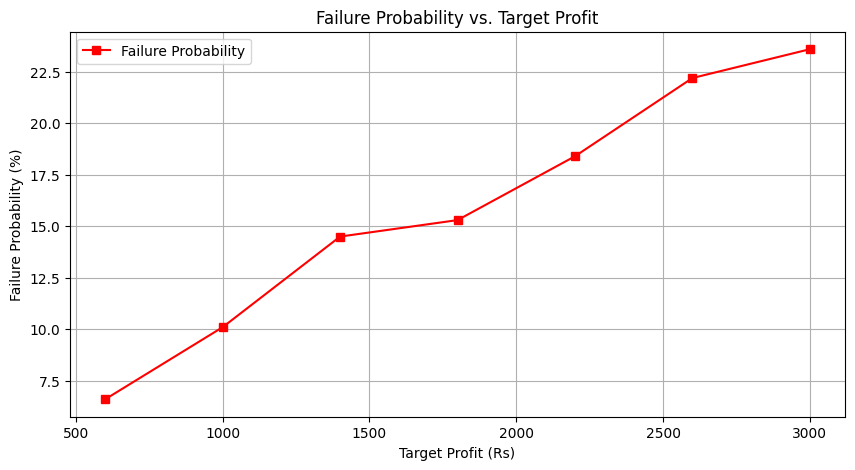

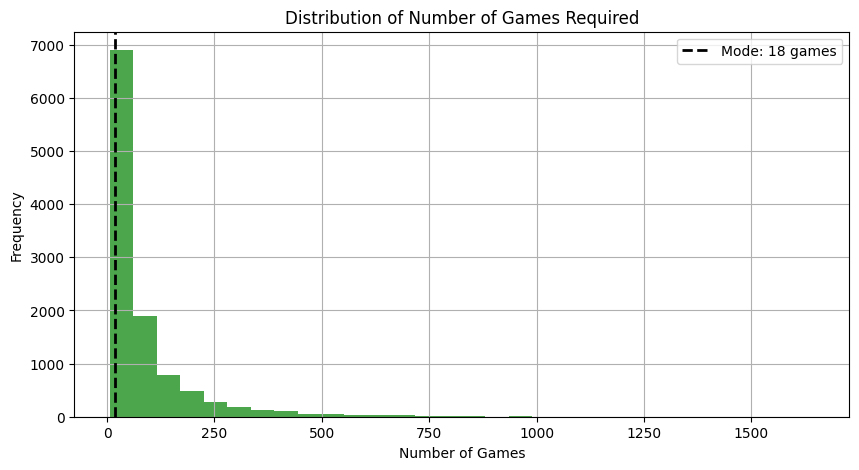

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Constants
BET_UNIT = 200  # Rs. 200 per chip
SIMULATIONS = 1000  # Number of simulations

# Oscar's Grind Strategy

def oscars_grind(start_balance, target_profit):
    balance = start_balance
    profit = 0
    bet = BET_UNIT
    game_count = 0
    
    while profit < target_profit and balance >= bet:
        outcome = np.random.choice([-1, 1])  # -1 for loss, 1 for win
        balance += bet * outcome
        profit += bet * outcome
        game_count += 1
        
        # Strategy: Increase bet by one unit after a win, reset after reaching a new profit
        if outcome == 1:
            bet = min(BET_UNIT, target_profit - profit)  # Ensure bet does not exceed remaining profit target
        else:
            bet = min(bet + BET_UNIT, target_profit - profit)
    
    return game_count, balance >= start_balance + target_profit

# Failure Probability vs. Starting Balance
start_balances = np.arange(5000, 15500, 1000)
targets = np.arange(600, 3300, 400)

failure_prob_balances = []
failure_prob_targets = []
game_counts = []

for start_balance in start_balances:
    failures = 0
    game_counts_per_balance = []
    for _ in range(SIMULATIONS):
        games, success = oscars_grind(start_balance, 2000)  # Fixed target for balance variation
        if not success:
            failures += 1
        game_counts_per_balance.append(games)
    failure_prob_balances.append(failures / SIMULATIONS * 100)
    game_counts.append(game_counts_per_balance)

for target in targets:
    failures = 0
    for _ in range(SIMULATIONS):
        _, success = oscars_grind(10000, target)  # Fixed balance for target variation
        if not success:
            failures += 1
    failure_prob_targets.append(failures / SIMULATIONS * 100)

# Most common number of games required
flattened_game_counts = [game for sublist in game_counts for game in sublist]
mode_games = Counter(flattened_game_counts).most_common(1)[0][0]

# Plot failure probability vs. starting balance
plt.figure(figsize=(10, 5))
plt.plot(start_balances, failure_prob_balances, marker='o', label='Failure Probability')
plt.xlabel("Starting Balance (Rs)")
plt.ylabel("Failure Probability (%)")
plt.title("Failure Probability vs. Starting Balance")
plt.legend()
plt.grid()
plt.show()

# Plot failure probability vs. target amount
plt.figure(figsize=(10, 5))
plt.plot(targets, failure_prob_targets, marker='s', color='r', label='Failure Probability')
plt.xlabel("Target Profit (Rs)")
plt.ylabel("Failure Probability (%)")
plt.title("Failure Probability vs. Target Profit")
plt.legend()
plt.grid()
plt.show()

# Plot mode of number of games required
plt.figure(figsize=(10, 5))
plt.hist(flattened_game_counts, bins=30, color='g', alpha=0.7)
plt.axvline(mode_games, color='black', linestyle='dashed', linewidth=2, label=f'Mode: {mode_games} games')
plt.xlabel("Number of Games")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Games Required")
plt.legend()
plt.grid()
plt.show()

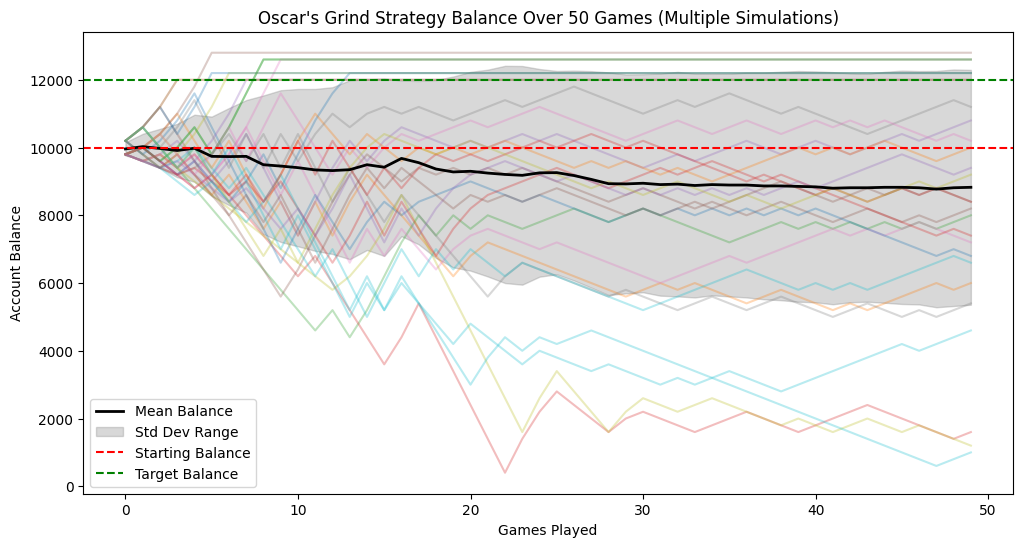

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
num_simulations = 30  # Number of simulations
num_games = 50  # Number of games per simulation
initial_balance = 10000
bet_unit = 200  # Rs. 200 per chip
target_profit = 2000  # Win target

# Function to simulate Oscar's Grind strategy
def oscars_grind_simulation(initial_balance, target_profit, num_games):
    balance_history = []
    for _ in range(num_simulations):
        balance = initial_balance
        bet = bet_unit
        game_results = []
        wins = 0
        for _ in range(num_games):
            outcome = np.random.choice([1, -1], p=[18/37, 19/37])  # European roulette odds
            balance += bet * outcome
            game_results.append(balance)
            
            # Adjust bet size according to Oscar's Grind rules
            if outcome == 1:  # Win
                wins += 1
                if wins < target_profit / bet_unit:
                    bet = min(bet + bet_unit, bet_unit * (target_profit / bet_unit - wins))
            else:  # Loss
                bet = max(bet_unit, bet)
            
            if balance <= 0 or balance >= initial_balance + target_profit:
                break
        
        # Store the trajectory for this simulation
        balance_history.append(game_results + [balance] * (num_games - len(game_results)))
    
    return np.array(balance_history)

# Run simulations
balances = oscars_grind_simulation(initial_balance, target_profit, num_games)

# Compute statistics
mean_balance = np.mean(balances, axis=0)
std_dev = np.std(balances, axis=0)

# Plot results
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(balances[i], alpha=0.3)
plt.plot(mean_balance, color='black', linewidth=2, label='Mean Balance')
plt.fill_between(range(num_games), mean_balance - std_dev, mean_balance + std_dev, color='gray', alpha=0.3, label='Std Dev Range')
plt.axhline(initial_balance, color='red', linestyle='dashed', label='Starting Balance')
plt.axhline(initial_balance + target_profit, color='green', linestyle='dashed', label='Target Balance')
plt.xlabel('Games Played')
plt.ylabel('Account Balance')
plt.title("Oscar's Grind Strategy Balance Over 50 Games (Multiple Simulations)")
plt.legend()
plt.show()